Stock Market Prediction Using ML (LinearRegression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
stock = pd.read_csv(r'..\Data\BAJFINANCE.NS.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/07/2002,5.239737,5.540927,5.239737,5.412679,4.001257,21923
1,02/07/2002,5.523439,5.537041,5.421423,5.443769,4.024240,61044
2,03/07/2002,5.505950,5.545785,5.328151,5.466116,4.040759,34160
3,04/07/2002,5.501093,5.572018,5.417537,5.528297,4.086726,27892
4,05/07/2002,5.563274,5.656546,5.474860,5.590478,4.132694,58976


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4754 non-null   object 
 1   Open       4754 non-null   float64
 2   High       4754 non-null   float64
 3   Low        4754 non-null   float64
 4   Close      4754 non-null   float64
 5   Adj Close  4754 non-null   float64
 6   Volume     4754 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 260.1+ KB


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'])

C:\Users\pradi\AppData\Local\Temp\ipykernel_14208\688752022.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [5]:
print(f"Dataframe contains stock prices between {stock.Date.min()} {stock.Date.max()}.")
print(f"Total days = {(stock.Date.max() - stock.Date.min()).days} days.")

Dataframe contains stock prices between 2002-01-07 00:00:00 2021-12-08 00:00:00.
Total days = 7275 days.


In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4.754000e+03
mean,840.469888,853.558934,826.480504,840.350409,834.852498,9.237948e+05
std,1442.351104,1463.742878,1420.557808,1442.793047,1439.905008,2.048104e+06
min,3.673548,4.081612,3.673548,4.064124,3.004354,0.000000e+00
25%,27.636627,28.428467,27.031090,27.669662,24.963553,7.354025e+04
50%,75.642460,77.488461,74.525139,75.589020,71.203041,2.357545e+05
75%,1011.875000,1025.750000,990.750000,1003.907501,993.961929,8.860645e+05
max,7005.000000,7054.000000,6921.000000,6980.100098,6980.100098,2.596005e+07


<AxesSubplot: >

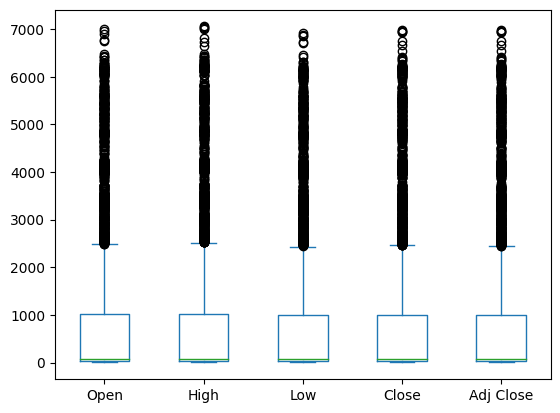

In [7]:
stock[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the layout for our plot
layout = go.Layout(
    title= "Stock Price of Tesla",
    xaxis=dict(
        title ='Date',
        titlefont = dict(
            family="Courier New, monospace",
            size=18,
            color='#7f7f7f',
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color= '#7f7f7f'
        )
    )
)

maruti_date = [{'x':stock['Date'], 'y':stock['Close']}]
plot = go.Figure(data =maruti_date, layout=layout)

In [9]:
iplot(plot)

In [10]:
#bulding the regresstion model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score


In [11]:
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train,x_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101) 

In [12]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
maruti_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = maruti_data,layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate score for model evalution
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(x_test))}
'''

print(score)


Metric           Train                Test        
r2_score  0.5738765292396902	0.5667028823812439
MSE       878791.8097843961	920895.7379659734

